
# Brazil Hospital Appointment Analysis Report

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis report mainly focuses over 100k data which was collected from Brazil hospitals on the patient appointment details and whether the patient turned up for his or her appointment.

Dataset also tells some of the following details related to patients who have book their appointment:-
* Neighbourhood - Where the appointment takes place.
* Age - Patient's Age.
* Gender -  Patients's Gender.
* Scholarship - This indicated whether the patient is entitled to Brazilian welfare program.
* No-show - This tells us whether the patient whether turned up for his or her appointment.

Report focuses on the Gender, Age, Scholarship, Day and Month based analysis.

## Package importing



In [1]:
# Importing necessary python packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Importing the 'No-show' dataset.

df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')



### General Properties

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>* We should rename 'No-show' column name to 'No_show'
>* **ScheduledDay and AppointmentDay** field datatype should be datetme format.
>* **Scholarship,Hipertension,Diabetes,Alcoholism,Handcap and SMS_received** field datatype should be boolean.

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Before data cleaning:-**  There are around 110527 data entries collected from brazilian hospitals with 14 field values.

> **Note:-** There is no missing values in any of the fields. 

In [7]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)



> * We can see that there is negative value '-1' for an "Age" field. we have to remove that entries before we do futher analysis.



In [8]:
df.groupby('Handcap')['PatientId'].count()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: PatientId, dtype: int64


> * According to the dataset the 'Handcap' field should have either 0 or 1 as values. we have to remove the entries with incorrect values.


### Data Cleaning

In [9]:
# Converting 'object' datatype to 'datetime' datatype for "ScheduledDay" and "AppointmentDay" field.

df['ScheduledDay']= pd.to_datetime(df['ScheduledDay']) 
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay']) 


In [10]:
# Retaining entries with only values '0' and '1' for "Handcap" field. Removing entries with value '2','3' and '4'
df= df.query('Handcap in (0,1)')

In [11]:
# Removing "Age" entries with negative values.
df= df.query('Age >= 0')

In [12]:
# Coverting 'Hipertension' value to Boolean values
df.loc[df['Hipertension'] == 1, 'Hipertension'] = True
df.loc[df['Hipertension'] == 0, 'Hipertension'] = False

# Coverting 'Diabetes' value to Boolean values
df.loc[df['Diabetes'] == 1, 'Diabetes'] = True
df.loc[df['Diabetes'] == 0, 'Diabetes'] = False

# Coverting 'Alcoholism' value to Boolean values
df.loc[df['Alcoholism'] == 1, 'Alcoholism'] = True
df.loc[df['Alcoholism'] == 0, 'Alcoholism'] = False

# Coverting 'Handcap' value to Boolean values
df.loc[df['Handcap'] == 1, 'Handcap'] = True
df.loc[df['Handcap'] == 0, 'Handcap'] = False

# Coverting 'SMS_received' value to Boolean values
df.loc[df['SMS_received'] == 1, 'SMS_received'] = True
df.loc[df['SMS_received'] == 0, 'SMS_received'] = False

# Coverting 'Scholarship' value to Boolean values
df.loc[df['Scholarship'] == 1, 'Scholarship'] = True
df.loc[df['Scholarship'] == 0, 'Scholarship'] = False

In [13]:
# Renaming column name "No-show" to "No_show"
df.rename(columns={"No-show" : "No_show"},inplace=True)

In [14]:
# Removing 'PatientId' and 'AppointmentID' column fields since it is not nessary for our analysis.
df.drop(columns=['PatientId', 'AppointmentID'],axis=1,inplace=True)

In [15]:
# Adding new column field called 'Month' extracted from 'AppointmentDay' field
df['Month']=df['AppointmentDay'].apply(lambda x: x.strftime('%B'))

# Adding new column field called 'Day' extracted from 'AppointmentDay' field
df['Day']=df['AppointmentDay'].apply(lambda x: x.strftime('%A'))

# Removing 'AppointmentDay' and 'ScheduledDay' column fields since it is not nessary for our analysis.
df.drop(columns=['AppointmentDay', 'ScheduledDay'],axis=1,inplace=True)

In [16]:
# Dataset information after data cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110327 non-null  object
 1   Age            110327 non-null  int64 
 2   Neighbourhood  110327 non-null  object
 3   Scholarship    110327 non-null  object
 4   Hipertension   110327 non-null  object
 5   Diabetes       110327 non-null  object
 6   Alcoholism     110327 non-null  object
 7   Handcap        110327 non-null  object
 8   SMS_received   110327 non-null  object
 9   No_show        110327 non-null  object
 10  Month          110327 non-null  object
 11  Day            110327 non-null  object
dtypes: int64(1), object(11)
memory usage: 10.9+ MB


> **After data cleaning and adding new fields for analysis we are having 110327 entries with 13 columns**

<a id='eda'></a>
## Exploratory Data Analysis

### What age group the patients appointments are more?

To check at which Age the patients bookings for appointments are more

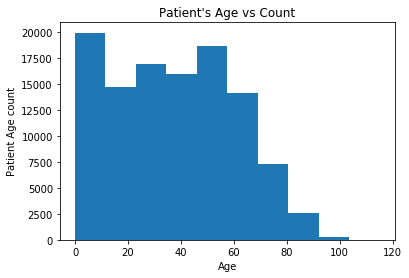

In [17]:
df.Age.hist(grid=False);
plt.xlabel('Age')
plt.ylabel('Patient Age count')
plt.title("Patient's Age vs Count")
plt.show()

> * There are more patient's less than 60 years of age.

### Which Gender has more number of appointment bookings?
To check which Gender has highest number of appointment bookings.

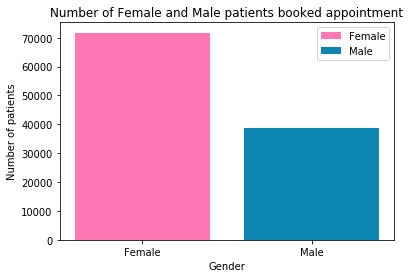

In [93]:
fig, ax = plt.subplots(figsize=(6,4))
Gender_count=df.groupby('Gender',as_index=False).count()
ax.bar(Gender_count['Gender'][0],Gender_count['Age'][0], color=('#ff77b4'),label=('Female'))
ax.bar(Gender_count['Gender'][1],Gender_count['Age'][1], color=('#0C86B1'),label=('Male'))
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Number of Female and Male patients booked appointment')
plt.legend()
plt.show()

> * There are more female patients than male patients.

### What is the number of patients who turned up for appointments?

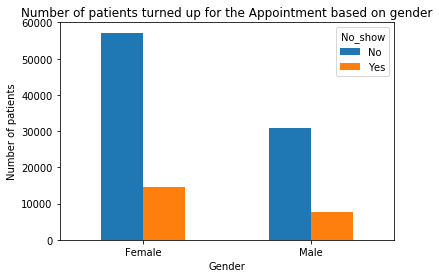

In [103]:
fig, ax = plt.subplots(figsize=(6,4))
df.groupby(['Gender', 'No_show'])['Gender'].count().unstack().plot(kind='bar',ax=ax)
plt.xticks(np.arange(2), ('Female', 'Male'),rotation=0)
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Number of patients turned up for the Appointment based on gender')
plt.show()

> * From above bar chart we can say that both Male and Female patients turned up to the appointment more than the patients who didn't turn up


### How does the patients scholarship impact on appointment turn up for each gender?

In [52]:
df_schol=df.groupby(['Gender', 'Scholarship','No_show'],as_index=False).count()
df_schol['Percentage'] = round(df_schol.groupby('Gender')['Age'].apply(lambda x:100 * x / float(x.sum())), ndigits=1)
df_Female_No=df_schol.query('Gender == "F" and No_show== "No"')
df_Female_Yes=df_schol.query('Gender == "F" and No_show== "Yes"')
df_Male_No=df_schol.query('Gender == "M" and No_show== "No"')
df_Male_Yes=df_schol.query('Gender == "M" and No_show== "Yes"')
df_Female_No['Percentage'] = round(df_Female_No.groupby('Gender')['Age'].apply(lambda x:100 * x / float(x.sum())), ndigits=1)
df_Female_Yes['Percentage'] = round(df_Female_Yes.groupby('Gender')['Age'].apply(lambda x:100 * x / float(x.sum())), ndigits=1)
df_Male_No['Percentage'] = round(df_Male_No.groupby('Gender')['Age'].apply(lambda x:100 * x / float(x.sum())), ndigits=1)
df_Male_Yes['Percentage'] = round(df_Male_Yes.groupby('Gender')['Age'].apply(lambda x:100 * x / float(x.sum())), ndigits=1)

#### Female patients who turned up for appointment.

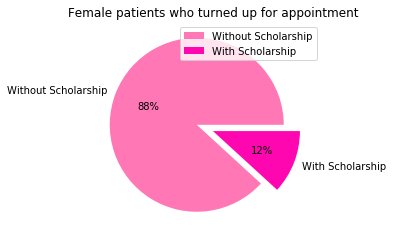

In [99]:
fig, ax = plt.subplots(figsize=(4,4))
explode = (0.2, 0)
colors = ["#ff77b4", "#ff07b0"]
ax.pie(df_Female_No['Percentage'],explode=explode,autopct='%1.0f%%',labels=('Without Scholarship','With Scholarship'),colors=colors)
plt.title('Female patients who turned up for appointment')
leg = ax.legend(loc='best')
plt.show()

#### Female patients who did not turned up for appointment.

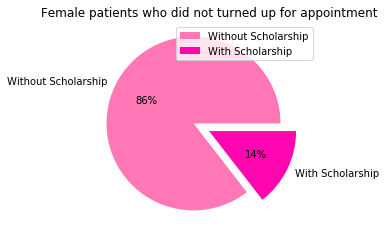

In [98]:
fig, ax = plt.subplots(figsize=(4,4))
colors = ["#ff77b4", "#ff07b0"]
ax.pie(df_Female_Yes['Percentage'],explode=explode,autopct='%1.0f%%',labels=('Without Scholarship','With Scholarship'),colors=colors)
leg = ax.legend(loc='best')
plt.title('Female patients who did not turned up for appointment')
plt.show()

> **From above two pie chart for female patients, we can clearly say the around 14% female patients with scholarship did not turn up for appointment which is more the 2% female patients with scholarship who turned up for appointment.**

#### Male patients who turned up for appointment.

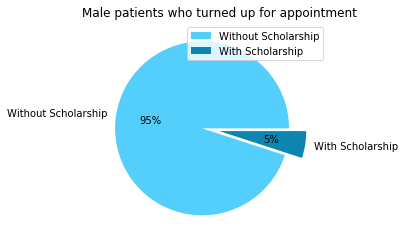

In [101]:
fig, ax = plt.subplots(figsize=(4,4))
colors = ["#54CFFB", "#0C86B1"]
ax.pie(df_Male_No['Percentage'],explode=explode,autopct='%1.0f%%',labels=('Without Scholarship','With Scholarship'),colors=colors)
leg = ax.legend(loc='best')
plt.title('Male patients who turned up for appointment')
plt.show()

#### Male patients who did not turned up for appointment.

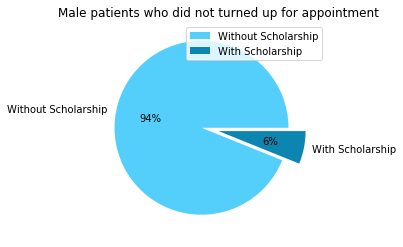

In [102]:
fig, ax = plt.subplots(figsize=(4,4))
colors = ["#54CFFB", "#0C86B1"]
ax.pie(df_Male_Yes['Percentage'],explode=explode,autopct='%1.0f%%',labels=('Without Scholarship','With Scholarship'),colors=colors )
leg = ax.legend(loc='best')
plt.title('Male patients who did not turned up for appointment')
plt.show()

> **From above two pie chart for Male patients, we can clearly say the around 6% Male patients with scholarship did not turn up for appointment which is more the 1% Male patients with scholarship who turned up for appointment.**


### Which month has highest number of appointment booking?

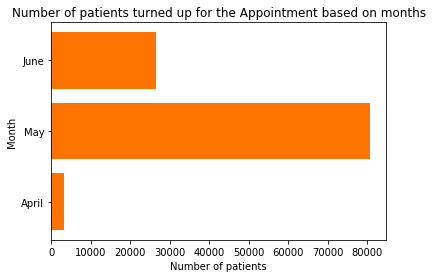

In [145]:
months = ["April", "May", "June"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
df_month=df.groupby('Month',as_index=False)['Gender'].count()
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(df_month['Month'],df_month['Gender'],color="#FF7400")
plt.yticks(np.arange(3), ('April', 'May', 'June'),rotation=0)
plt.ylabel('Month')
plt.xlabel('Number of patients')
plt.title('Number of patients turned up for the Appointment based on months')
plt.show()

> **May month saw highest number of appointment bookings**

### Which Day has highest number of appointment booking?

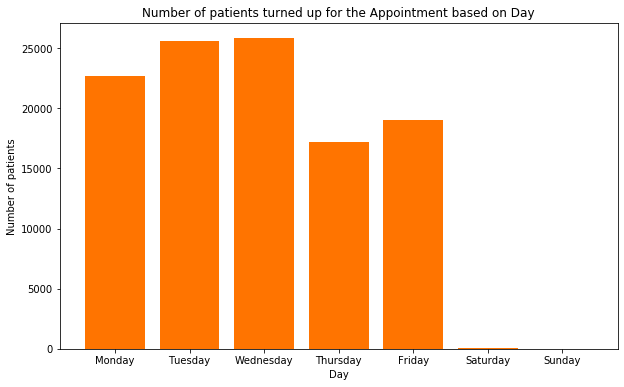

In [143]:
Day = ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
df['Day'] = pd.Categorical(df['Day'], categories=Day, ordered=True)
df_Day=df.groupby('Day',as_index=False)['Gender'].count()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_Day['Day'],df_Day['Gender'],color="#FF7400")

plt.xlabel('Day')
plt.ylabel('Number of patients')
plt.title('Number of patients turned up for the Appointment based on Day')
plt.show()



> **Wednesday saw highest number of appointment bookings**

<a id='conclusions'></a>
## Conclusions

> Based on the detailed analysis of the Brazillian hospital appointment data, we can come to following conclusions:-
> * It is evident that there are more female patients who book appointments than the male patients.
> * Majority of the patients who book appointments are aged below 60.
> * Patients who are having scholarship tend to miss more appointments than the patients who dont have scholarship. 
> * April month saw the least number of appointment bookings.
> * Weekends has very least number appointment bookings compared to weekdays.